<a href="https://colab.research.google.com/github/Akhil-2003/Internship_task3/blob/main/Internship_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Handwritten digit recognition using MNIST dataset

---


In [10]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score

In [11]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

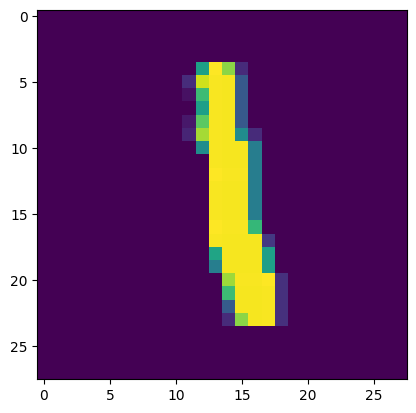

In [15]:
plt.imshow(X_train[6])

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2750 - accuracy: 0.9193 - val_loss: 0.1381 - val_accuracy: 0.9585
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1186 - accuracy: 0.9648 - val_loss: 0.1072 - val_accuracy: 0.9673
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0808 - accuracy: 0.9749 - val_loss: 0.1021 - val_accuracy: 0.9702
Epoch 4/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0959 - val_accuracy: 0.9709
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9850 - val_loss: 0.1066 - val_accuracy: 0.9694
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0375 - accuracy: 0.9878 - val_loss: 0.1066 - val_accuracy: 0.9731
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0935 - val_accuracy:

In [21]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [22]:
y_pred = y_prob.argmax(axis=1)

In [23]:
accuracy_score(y_test,y_pred)

0.9746

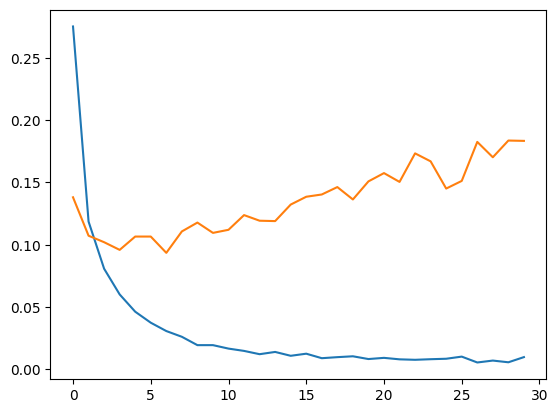

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

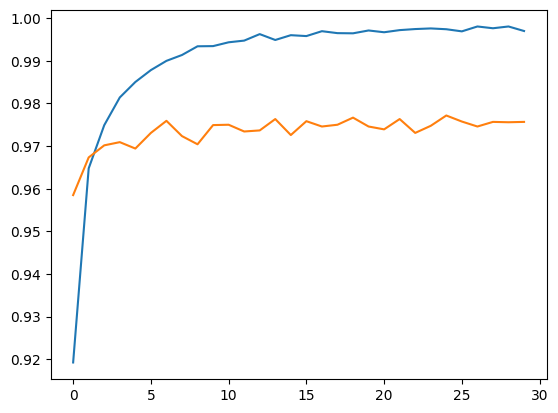

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

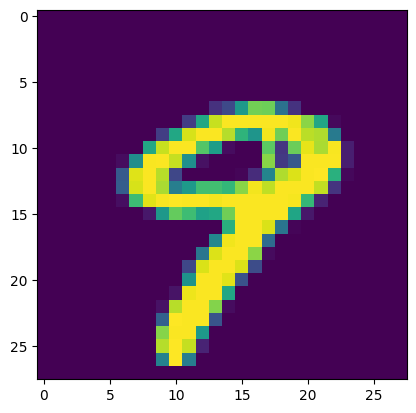

In [26]:
plt.imshow(X_test[9])

In [27]:
model.predict(X_test[9].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 30ms/step


array([9])